In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/crime.csv", index_col = ["object_id", "date"], parse_dates = True)
level_values = df.index.get_level_values

In [3]:
df_agg = df.groupby([level_values(0)] + [pd.Grouper(freq='W', closed='left', level=-1)]).sum()[["cassualties"]]
df_agg.sort_index(level=['object_id','date'], inplace=True, ascending=[True, True])
idx = pd.IndexSlice

In [4]:
all_weeks = df_agg.index.levels[1].tolist()

In [52]:
df_filter = df_agg.loc[idx[:, all_weeks[0]:all_weeks[11]], :].unstack(level = 1)
df_filter = df_filter.fillna(0)

### Shift first row

In [53]:
matrix_vals = df_filter.values

In [54]:
nn = matrix_vals.shape[0]
correlations = np.zeros((nn, nn))
for i in range(nn):
    corr_vals = np.insert(matrix_vals, 0, np.roll(matrix_vals[i, :], 1), axis = 0)
    corr_vals = corr_vals[:, 1:]
    correlations[i] = np.corrcoef(corr_vals)[0, 1:]

/home/dianae/Workspace/crimenNL/vcrime/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/dianae/Workspace/crimenNL/vcrime/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

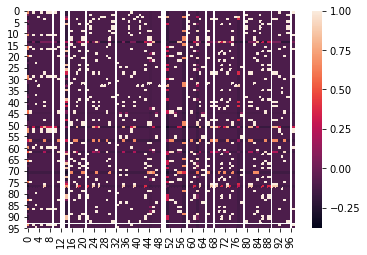

In [56]:
heat_map = sns.heatmap(correlations)
plt.show()